# "Guassian_Blur_FlexTouch"
> "In this blog, we test Gaussian Blur in scipy.ndimage package with different border parameters."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

#Gaussian Blur
A Gaussian Blur is the result of applying a Gaussian function to an image. In computer vision, it is frequently employed to reduce image noise and detail. Visually, it simulates the effect the eye perceives as an object from a close foreground moves farther and is gradually subsumed into a background.

### Implementation
Gimp offers a Gaussian Blur plug-in, which sets the value of each pixel in the active selection to the average of all other values in a radius given sa an input. Gimp's blur function has been significantly revised between versions 2.08 and 2.10. Note that parameters have been down-shifted by a factor of 3. Historically, the team has used Gimp to manually blur images.

The Python Scipy library offers a way to automate the task in the ['gaussian_filter()' function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to impose a blur over an input array. This function convolves the original image array with a series of one-dimensional filters. Splitting the implementation over multiple directional passes results in the same output as a multi-dimensional pass, but with a lower total number of calculations.

Matching Gimp implementations of the Gaussian blur functions is done by 

### Noteworthy parameters for gaussian_filter()
Sigma: The Gaussian function operates as a low pass filter. As the name implies, the function passes low frequencies and filters out high ones. The role of Sigma in the Gaussian function is to control variation around the mean value around a point as it is convoluted. In other words, it controls the radius of pixels of interest that operate on the pixel being convolved in the filter. Higher Sigma values are correlated with greater blurring, and vice versa.

Mode: Mode takes 'reflect', 'constant', 'nearest', 'mirror', and 'wrap' as arguments. It's purpose is to determine "how the input array is extended when the filter overlaps a border". Examples of this behavior are shown below.

# Python Implementation from Different Packages



## scipy.ndimage


https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html


In [6]:
from PIL import Image
import numpy as np
from IPython.display import  display
from scipy.ndimage import gaussian_filter
import scipy
print("current scipy.ndimage version is : ", scipy.ndimage.__version__)
def gaussianBlurring(arr, lvl=1.2, order=0, mode='nearest'):
    """
    :param arr: image array in 3d
    :lvl: scalar or sequence of scalar; standard deviation for Gaussian kernel
    :return: gaussian blured image array
    """
    # im_gau = im.filter(ImageFilter.GaussianBlur(radius=lvl))
    arr_gau = gaussian_filter(arr, sigma=lvl, order=order, mode=mode)
    arr_gau[arr_gau > 255.0] = 255
    new_arr = np.array(arr_gau.astype(np.uint8))
    return new_arr


current scipy.ndimage version is :  2.0


original image


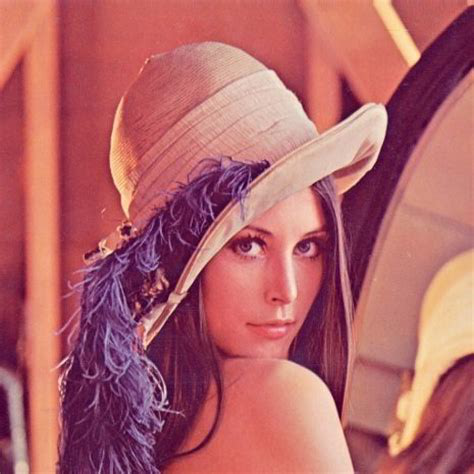

image shape is :  (474, 474, 3)


In [11]:
# open some images
image = Image.open('sample_image.jpg')
print("original image")
display(image)
# convert image to array
image_arr = np.array(image)
print("image shape is : ", image_arr.shape)

Note here we blur the 3 channel separately to manually set the last axis be our channel. Scipy.ndimage.gaussian_filter does not have a channel parameter for any array higher than 2 dimension, so we have to do it manually.

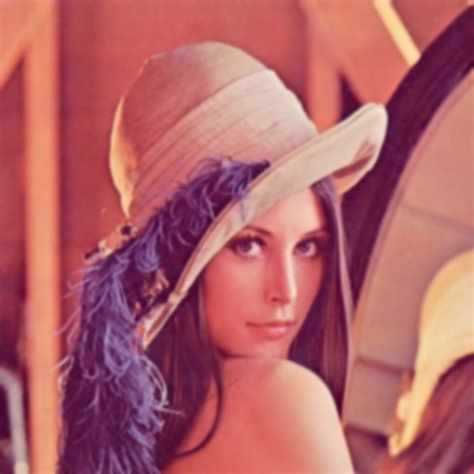

In [12]:
# use our gaussianBLurring function
image_arr_blur = image_arr
image_arr_blur[:,:,0] = gaussianBlurring(image_arr[:,:,0], lvl=1.3, mode='reflect')
image_arr_blur[:,:,1] = gaussianBlurring(image_arr[:,:,1], lvl=1.3, mode='reflect')
image_arr_blur[:,:,2] = gaussianBlurring(image_arr[:,:,2], lvl=1.3, mode='reflect')
image_blur = Image.fromarray(image_arr_blur)
display(image_blur)

### Sigma

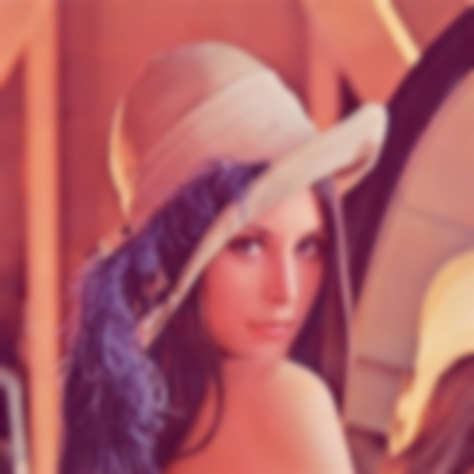

In [13]:
# use different simga
image_arr_blur[:,:,0] = gaussianBlurring(image_arr[:,:,0], lvl=3.3, mode='reflect')
image_arr_blur[:,:,1] = gaussianBlurring(image_arr[:,:,1], lvl=3.3, mode='reflect')
image_arr_blur[:,:,2] = gaussianBlurring(image_arr[:,:,2], lvl=3.3, mode='reflect')
image_blur = Image.fromarray(image_arr_blur)
display(image_blur)

The larger sigma produce heavier blur. In this comparison, we use sigma=1.3 on the first one, and sigma=3.3 on the second. It's obvious that the first image is clearer than the second.

### On Color Leveling Image

original image


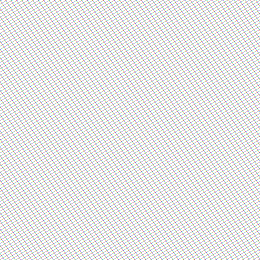

blurred image


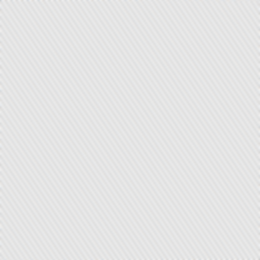

In [36]:
image_lvl = Image.open('/content/sample_lvl_image.png')
print('original image')
display(image_lvl)
image_lvl_arr = np.array(image_lvl)
image_lvl_arr_blur = gaussianBlurring(image_lvl_arr, lvl=1.3, mode='reflect')
image_lvl_blur = Image.fromarray(image_lvl_arr_blur)
print('blurred image')
display(image_lvl_blur)

### Border Modes in scipy.ndimage 

There are 5 types of mode parameter


1.   ‘reflect’ (d c b a | a b c d | d c b a)
The input is extended by reflecting about the edge of the last pixel. This mode is also sometimes referred to as half-sample symmetric.

2.   ‘constant’ (k k k k | a b c d | k k k k)
The input is extended by filling all values beyond the edge with the same constant value, defined by the cval parameter.

3.   ‘nearest’ (a a a a | a b c d | d d d d)
The input is extended by replicating the last pixel.

4.   ‘mirror’ (d c b | a b c d | c b a)
The input is extended by reflecting about the center of the last pixel. This mode is also sometimes referred to as whole-sample symmetric.

5.   ‘wrap’ (a b c d | a b c d | a b c d)
The input is extended by wrapping around to the opposite edge.

Below are the examples that only show top 10 pixels of the blur results

#### current Gaussian image

current Gaussian image


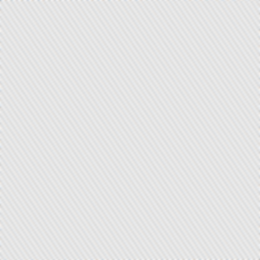

In [15]:
image_gau = Image.open('/content/sample_gaussian_image.png')
print('current Gaussian image')
display(image_gau)
image_gau_arr = np.array(image_gau)

#### reflect

In [16]:
image_lvl_arr_blur_reflect = gaussianBlurring(image_lvl_arr, lvl=1.2, mode='reflect')
image_lvl_blur_reflect = Image.fromarray(image_lvl_arr_blur[-10:-1,:, ])

#### constant

In [17]:
image_lvl_arr_blur_constant = gaussianBlurring(image_lvl_arr, lvl=1.2, mode='constant')
image_lvl_blur_constant = Image.fromarray(image_lvl_arr_blur_constant[-10:-1,:, ])

#### nearest

In [18]:
image_lvl_arr_blur_nearest = gaussianBlurring(image_lvl_arr, lvl=1.2, mode='nearest')
image_lvl_blur_nearest = Image.fromarray(image_lvl_arr_blur_nearest[-10:-1,:, ])

#### mirror

In [19]:
image_lvl_arr_blur_mirror = gaussianBlurring(image_lvl_arr, lvl=1.2, mode='mirror')
image_lvl_blur_mirror = Image.fromarray(image_lvl_arr_blur_mirror[-10:-1,:, ])

#### wrap

In [20]:
image_lvl_arr_blur_wrap = gaussianBlurring(image_lvl_arr, lvl=1.2, mode='wrap')
image_lvl_blur_wrap = Image.fromarray(image_lvl_arr_blur_wrap[-10:-1,:, ])

#### Show top 10 pixels of the results

In [21]:
print('original image')
display(Image.fromarray(image_lvl_arr[0:15,:,]))
print('mode=reflect')
display(image_lvl_blur_reflect)
print('mode=constant')
display(image_lvl_blur_constant)
print('mode=nearest')
display(image_lvl_blur_nearest)
print('mode=reflect')
display(image_lvl_blur_mirror)
print('mode=wrap')
display(image_lvl_blur_wrap)

original image


mode=reflect


mode=constant


mode=nearest


mode=reflect


mode=wrap


#### Mean Squared Error Between Different Mode

> Comparing mean squared error between different border parameters and current gaussian blur method.





In [22]:
# from sklearn.metrics import mean_squared_error
from skimage.metrics import mean_squared_error

print("MSE between 'reflect' and current image is : ", mean_squared_error(image_gau_arr, image_lvl_arr_blur_reflect))
print("MSE between 'constant' and current image is : ", mean_squared_error(image_gau_arr, image_lvl_arr_blur_constant))
print("MSE between 'nearest' and current image is : ", mean_squared_error(image_gau_arr, image_lvl_arr_blur_nearest))
print("MSE between 'mirror' and current image is : ", mean_squared_error(image_gau_arr, image_lvl_arr_blur_mirror))
print("MSE between 'wrap' and current image is : ", mean_squared_error(image_gau_arr, image_lvl_arr_blur_wrap))


MSE between 'reflect' and current image is :  0.26897435897435895
MSE between 'constant' and current image is :  5159.946932938856
MSE between 'nearest' and current image is :  0.0
MSE between 'mirror' and current image is :  1.2477613412228796
MSE between 'wrap' and current image is :  1.090216962524655


Note that border mode 'constant' gives a very different result than the others. 

## skimage.filters

https://scikit-image.org/docs/dev/api/skimage.filters.html#gaussian


For our color image with RGB 3 channels, we need to set the "multichannel" parameter to True, so last axis will be our channel.

Note that in skimage version 0.19, parameter "channel_axis" where we can choose which axis is the channel is used over "multichannel".

skimage version is :  0.18.3
uint8


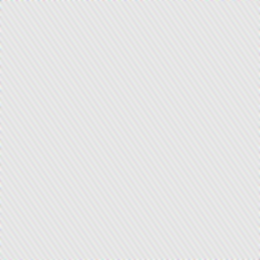

In [30]:
from skimage.filters import gaussian
import skimage

print("skimage version is : ", skimage.__version__)
gau_skimage_arr = (gaussian(image_lvl_arr, sigma=1.3, mode='nearest', multichannel=True)*255).astype(np.uint8)
print(gau_skimage_arr.dtype)
gau_skimage = Image.fromarray(gau_skimage_arr)
display(gau_skimage)

## Open CV

CV2 reads image in BGR order, may need to convert from our RGB image.

cv2.BORDER_REPLICATE is same as scipy "nearest' and skimage "nearest".

Convert color space function is cv2.cvtColor()

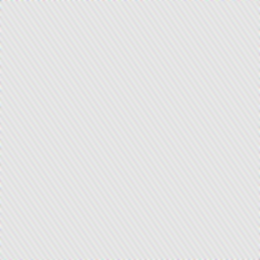

In [29]:
import cv2
from google.colab.patches import cv2_imshow
# read image
sample_image_cv2 = cv2.imread("sample_lvl_image.png")
gau_cv2 = cv2.GaussianBlur(sample_image_cv2, ksize=(11,11), sigmaX=1.3, sigmaY=1.3, borderType=cv2.BORDER_REPLICATE)
cv2_imshow(gau_cv2)

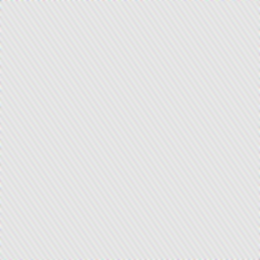

In [31]:
# convert color in cv2
gau_rgb_arr = cv2.cvtColor(gau_cv2, cv2.COLOR_BGR2RGB)
gau_rgb = Image.fromarray(gau_rgb_arr)

display(gau_rgb)

## MSE Between Different ackages

In [35]:
print("MSE between scipy and skimage is : ", mean_squared_error(image_lvl_arr_blur, gau_skimage_arr))
print("MSE between scipy and cv2 image is : ", mean_squared_error(image_lvl_arr_blur, gau_rgb_arr))
print("MSE between skimage and cv2 image is : ", mean_squared_error(gau_skimage_arr, gau_rgb_arr))

MSE between scipy and skimage is :  3.142248520710059
MSE between scipy and cv2 image is :  2.181972386587771
MSE between skimage and cv2 image is :  1.9019230769230768


## Different with Gimp

Softwares like Gimp has built-in gaussian blur functions. However the gaussian blur function is changed in newer version 2.10 from 2.08. So we did some tests to observe the differences.

Current Python 

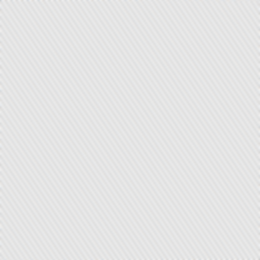

Gimp 2.08

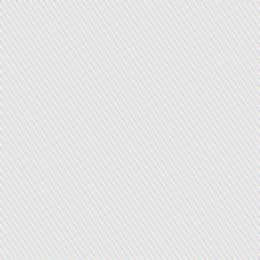

Gimp 2.10

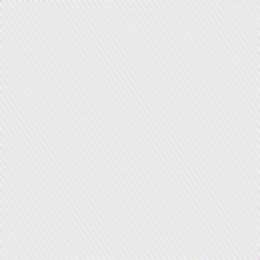

Note how slightly the difference is between three images, but this could affect us a lot when judging a image, mainly the color and the contrast.

Gaussian Blur is essential tool in our optical design @FlexTouch™
